In [72]:
!pip install pandas

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv('/Users/yasemindilarasucu/Desktop/gapminder_clean.csv')

In [75]:
!pip install matplotlib

In [76]:
!pip install pandas scipy plotly

In [77]:
import matplotlib.pyplot as plt

In [78]:
#filtering it for 1962
df_1962 = df[df['Year'] == 1962]

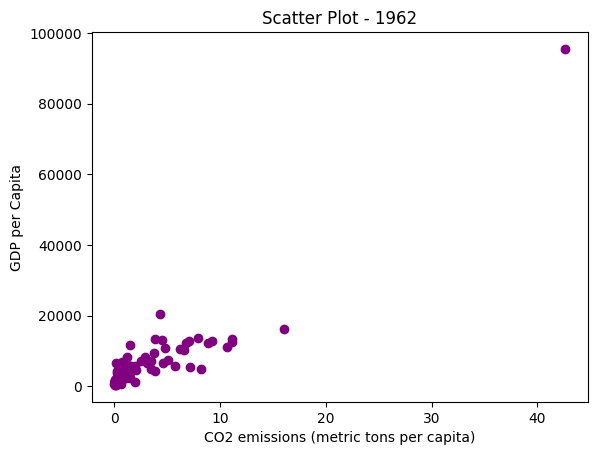

In [79]:
# Creating a scatter plot
plt.scatter(df_1962['CO2 emissions (metric tons per capita)'], df_1962['gdpPercap'], color='purple')
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('GDP per Capita')
plt.title('Scatter Plot - 1962')
plt.show()

In [80]:
import numpy as np
from scipy.stats import pearsonr

In [81]:
x = df_1962['CO2 emissions (metric tons per capita)']
y = df_1962['gdpPercap']

#Handling the NA values 

nan_mask = ~np.isnan(x) & ~np.isnan(y)
x_no_nan = x[nan_mask]
y_no_nan = y[nan_mask]


In [82]:
#calculating correlation 

correlation, p_value = pearsonr(x_no_nan, y_no_nan)
print(f'Correlation: {correlation}\nP-value: {p_value}')

Correlation: 0.9260816725019472
P-value: 1.1286792210038658e-46


In [83]:
#Finding the strongest correlation 

x = df['CO2 emissions (metric tons per capita)']
y = df['gdpPercap']

#Handling the infinite values

valid_mask = ~np.isnan(x) & ~np.isnan(y) & np.isfinite(x) & np.isfinite(y)
x_no_nan_inf = x[valid_mask]
y_no_nan_inf = y[valid_mask]

# Calculating the correlation after handling NaN and infinite values

correlation_values = [
    (year, pearsonr(df[(df['Year'] == year) & valid_mask]['CO2 emissions (metric tons per capita)'],
                   df[(df['Year'] == year) & valid_mask]['gdpPercap'])[0])
    for year in df['Year'].unique() if len(df[(df['Year'] == year) & valid_mask]) > 1
]

# Finding the year with the strongest correlation
max_corr_year, max_corr_value = max(correlation_values, key=lambda x: abs(x[1]))

print(f"The year with the strongest correlation is: {max_corr_year}")
print(f"Correlation value: {max_corr_value}")

# Filtering the dataset to that year for the next step
df_max_corr_year = df[df['Year'] == max_corr_year]


The year with the strongest correlation is: 1967
Correlation value: 0.938791838506331


In [84]:
import plotly.express as px

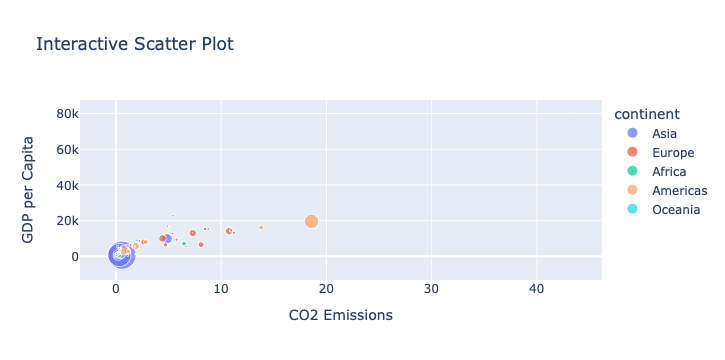

In [85]:
fig = px.scatter(df_max_corr_year, 
                 x='CO2 emissions (metric tons per capita)',
                 y='gdpPercap',
                 size='pop',  # Point size determined by population
                 color='continent',  # Color determined by continent
                 hover_name='Country Name',  # Use the correct column name for country
                 title='Interactive Scatter Plot',
                 labels={'CO2 emissions (metric tons per capita)': 'CO2 Emissions',
                         'gdpPercap': 'GDP per Capita'})

from IPython.display import display

# Showing the plot in notebook
display(fig)

In [86]:
#1. Relationship between continent and 'Energy use (kg of oil equivalent per capita)'

#As a statistical test:

#One-way ANOVA: To test if there are significant differences in 'Energy use' means among different continents.

from scipy.stats import f_oneway, ttest_ind

# Checking for the missing values in 'Energy use (kg of oil equivalent per capita)'

missing_values_energy = df['Energy use (kg of oil equivalent per capita)'].isnull().sum()

if missing_values_energy > 0:
    # Handle missing values
    df['Energy use (kg of oil equivalent per capita)'].fillna(df['Energy use (kg of oil equivalent per capita)'].mean(), inplace=True)

# Running the ANOVA test

result_anova = f_oneway(*[group['Energy use (kg of oil equivalent per capita)'] for name, group in df.groupby('continent')])

print(result_anova)

#results are showing that is significantly correlated between.

F_onewayResult(statistic=45.654602790619165, pvalue=6.923406484510737e-36)


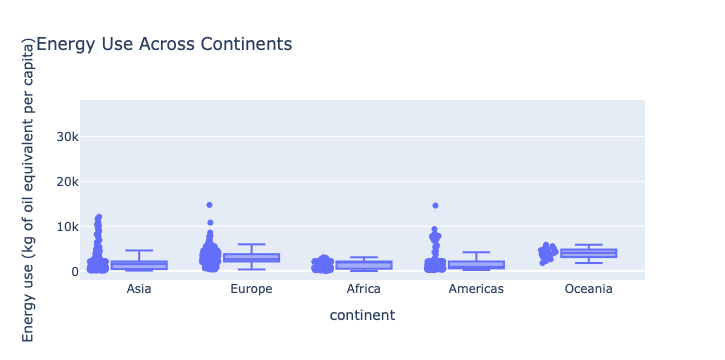

In [87]:
#making a boxplot:

fig_boxplot = px.box(df, x='continent', y='Energy use (kg of oil equivalent per capita)',
                     title='Energy Use Across Continents', points='all')

# Showing the plot
fig_boxplot.show()

In [88]:
#2. Significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990

# Independent two-sample t-test
europe_imports = df[(df['continent'] == 'Europe') & (df['Year'] > 1990)]['Imports of goods and services (% of GDP)']
asia_imports = df[(df['continent'] == 'Asia') & (df['Year'] > 1990)]['Imports of goods and services (% of GDP)']

result_ttest = ttest_ind(europe_imports, asia_imports, nan_policy='omit')
print(result_ttest)

#due to the p value is greater than the standard value, we can say that is not statistically significant. 

TtestResult(statistic=-1.4185256887958868, pvalue=0.15751969325554196, df=210.0)


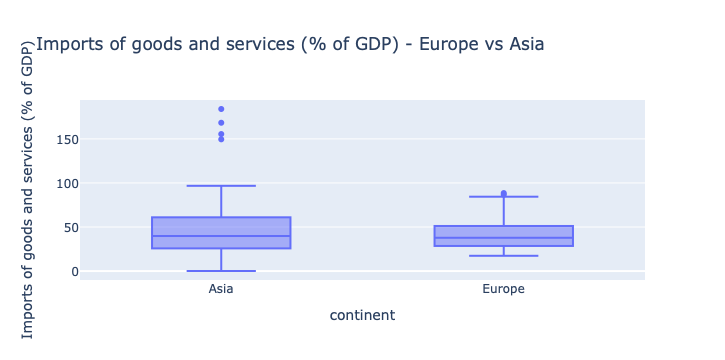

In [89]:
#visualization 

# Boxplot
fig_boxplot_imports = px.box(df[(df['continent'].isin(['Europe', 'Asia'])) & (df['Year'] > 1990)],
                              x='continent', y='Imports of goods and services (% of GDP)',
                              title='Imports of goods and services (% of GDP) - Europe vs Asia')
fig_boxplot_imports.show()

In [90]:
#3. Country with the highest 'Population density (people per sq. km of land area)' across all years

# Bar chart or interactive table
avg_population_density = df.groupby('Country Name')['Population density (people per sq. km of land area)'].mean()
country_highest_density = avg_population_density.idxmax()

#results
print(f"The country with the highest average population density is: {country_highest_density}")


The country with the highest average population density is: Macao SAR, China


In [91]:
#4. Country (or countries) with the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007

# Line chart or bar chart
life_expectancy_change = df[df['Year'].isin([1962, 2007])].pivot_table(
    index='Country Name', columns='Year', values='Life expectancy at birth, total (years)', aggfunc='mean')

# Calculate the increase
life_expectancy_change['Increase'] = life_expectancy_change[2007] - life_expectancy_change[1962]

#results
country_max_increase = life_expectancy_change['Increase'].idxmax()
print(f"The country with the greatest increase in life expectancy is: {country_max_increase}")

The country with the greatest increase in life expectancy is: Maldives
